# EDA & Feature Engineer

In [1]:
import pandas as pd
import numpy as np
import os, glob
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm

sns.set(style="whitegrid", font_scale=1)

In [2]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    #df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    #df['year'] = df['date'].dt.year
    #df['dayofyear'] = df['date'].dt.dayofyear
    #df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week #ofyear
    
    X = df[['dayofweek','quarter', 'month', 'weekofyear']]
    
   # X = df[['hour','dayofweek','quarter','month','year',
   #        'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

## Load Energy data 
We will focus on _Hourly Energy Demand_.

In [3]:
## Hourly Energy Demand
fileName_to_load = "data/energy.pkl"
with open(fileName_to_load, 'rb') as fp:
    data = pickle.load(fp)

data.keys()

dict_keys(['with_na', 'fill_na'])

In [4]:
## Data with NaN
energy_data = data['with_na']

## Data after imputing NaN
df = data['fill_na']

In [5]:
display(energy_data.head(5).T)
display(df.head(5).T)

time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.00,449.00,448.00,438.00,428.00
generation fossil brown coal/lignite,329.00,328.00,323.00,254.00,187.00
generation fossil gas,4844.00,5196.00,4857.00,4314.00,4130.00
generation fossil hard coal,4821.00,4755.00,4581.00,4131.00,3840.00
generation fossil oil,162.00,158.00,157.00,160.00,156.00
generation hydro pumped storage consumption,863.00,920.00,1164.00,1503.00,1826.00
generation hydro run-of-river and poundage,1051.00,1009.00,973.00,949.00,953.00
generation hydro water reservoir,1899.00,1658.00,1371.00,779.00,720.00
generation nuclear,7096.00,7096.00,7099.00,7098.00,7097.00
generation other,43.00,43.00,43.00,43.00,43.00


time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.00,449.00,448.00,438.00,428.00
generation fossil brown coal/lignite,329.00,328.00,323.00,254.00,187.00
generation fossil gas,4844.00,5196.00,4857.00,4314.00,4130.00
generation fossil hard coal,4821.00,4755.00,4581.00,4131.00,3840.00
generation fossil oil,162.00,158.00,157.00,160.00,156.00
generation hydro pumped storage consumption,863.00,920.00,1164.00,1503.00,1826.00
generation hydro run-of-river and poundage,1051.00,1009.00,973.00,949.00,953.00
generation hydro water reservoir,1899.00,1658.00,1371.00,779.00,720.00
generation nuclear,7096.00,7096.00,7099.00,7098.00,7097.00
generation other,43.00,43.00,43.00,43.00,43.00


In [6]:
display(energy_data.info())
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

None

In [7]:
energy_data.loc[:,energy_data.columns.str.contains('generation')].sum(axis=1)

time
2015-01-01 00:00:00+01:00    28251.0
2015-01-01 01:00:00+01:00    27818.0
2015-01-01 02:00:00+01:00    26796.0
2015-01-01 03:00:00+01:00    25223.0
2015-01-01 04:00:00+01:00    24620.0
                              ...   
2018-12-31 19:00:00+01:00    26415.0
2018-12-31 20:00:00+01:00    25213.0
2018-12-31 21:00:00+01:00    23987.0
2018-12-31 22:00:00+01:00    22748.0
2018-12-31 23:00:00+01:00    22605.0
Length: 35064, dtype: float64

In [8]:
energy_data

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


In [9]:
display(energy_data.describe().T)  # it has NaN.
display(df.describe().T) # no missing values

# Differences between the two
#display( (energy_data.describe().T - df.describe().T)/energy_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35045.0,972.116108,400.777536,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35046.0,2605.114735,1835.199745,0.00,1077.2500,2164.00,3757.00,9728.00
generation nuclear,35047.0,6263.907039,839.667958,0.00,5760.0000,6566.00,7025.00,7117.00
generation other,35046.0,60.228585,20.238381,0.00,53.0000,57.00,80.00,106.00


,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.531343,85.346266,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.094570,354.618269,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35064.0,5622.700647,2201.510984,0.00,4126.0000,4969.50,6429.00,20034.00
generation fossil hard coal,35064.0,4256.531271,1961.988937,0.00,2527.0000,4475.00,5839.00,8359.00
generation fossil oil,35064.0,298.342417,52.519927,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35064.0,475.582706,792.312704,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35064.0,972.201902,400.712304,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35064.0,2605.534123,1835.175078,0.00,1078.0000,2165.00,3758.00,9728.00
generation nuclear,35064.0,6263.483430,840.272333,0.00,5759.0000,6564.00,7025.00,7117.00
generation other,35064.0,60.226030,20.238792,0.00,53.0000,57.00,80.00,106.00


Add new features `total generation`

In [13]:
## Add new features
col_gen = df.columns[df.columns.str.contains('generation')]
df['total generation'] = df[col_gen].sum(axis=1)

In [14]:
# Show all columns
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'total generation'],
      dtype='object')

In [11]:
# df['day'] = df.index.to_frame()['time'].dt.dayofweek
# df['month'] = df.index.to_frame()['time'].dt.month
# df

## Load Weather data

In [15]:
fileName_to_load = "data/weather.pkl"
with open(fileName_to_load, 'rb') as fp:
    weather_feat = pickle.load(fp)

weather_feat.head()
weather_feat = weather_feat.reset_index().rename(columns={'dt_iso':'time'})

In [16]:
weather_gp = weather_feat.groupby('time').median()[['temp','pressure','humidity']]

In [17]:
df_EW = df.join(weather_gp)

In [18]:
## Check missing values
df_EW[df_EW.isnull().sum(axis=1)>0].head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation,temp,pressure,humidity
time,,,,,,,,,,,,,,,,,,,,,
2015-06-13 03:00:00+02:00,470.0,911.0,4628.0,6322.0,299.0,358.0,805.0,1823.0,5012.0,85.0,...,60.0,2226.0,22559.0,22460.0,52.78,61.60,46886.0,NaN,NaN,NaN
2015-06-24 14:00:00+02:00,477.0,765.0,5265.0,7893.0,360.0,50.0,839.0,3257.0,5967.0,82.0,...,5230.0,889.0,30442.0,30415.0,60.80,78.75,62538.0,NaN,NaN,NaN
2015-06-24 15:00:00+02:00,484.0,830.0,5178.0,7937.0,359.0,3.0,792.0,2486.0,5962.0,83.0,...,5046.0,1165.0,29475.0,29554.0,59.61,76.05,61362.0,NaN,NaN,NaN
2015-06-24 21:00:00+02:00,498.0,627.0,5758.0,7767.0,368.0,0.0,804.0,3337.0,5983.0,84.0,...,1073.0,2253.0,29522.0,29394.0,63.33,76.12,57604.0,NaN,NaN,NaN
2015-06-24 23:00:00+02:00,507.0,651.0,5700.0,7733.0,375.0,15.0,791.0,2851.0,5987.0,85.0,...,585.0,2318.0,27675.0,27683.0,59.61,71.08,55826.0,NaN,NaN,NaN


In [20]:
df_EW_interp = df_EW.interpolate(method='linear',
                                 limit_direction='forward',
                                 axis=0)

_ = create_features(df_EW_interp)
df_EW_interp.loc['2018-12-31','weekofyear'] = 53

In [21]:
#df_EW_interp
df_EW_interp.columns
#df_EW_interp.loc['2018-12-31','weekofyear']


Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'total generation', 'temp', 'pressure', 'humidity',
       'date', 'dayofweek', 'quarter', 'month', 'weekofyear'],
      dtype='object')

,dayMin,dayMax,dayofweek,quarter,month,weekofyear
time,,,,,,
2015-01-01 00:00:00+01:00,19905.0,27478.0,3,1,1,1
2015-01-02 00:00:00+01:00,22066.0,31370.0,4,1,1,1
2015-01-03 00:00:00+01:00,21145.0,28416.5,5,1,1,1
2015-01-04 00:00:00+01:00,21929.0,30728.5,6,1,1,1
2015-01-05 00:00:00+01:00,19964.0,25336.5,0,1,1,2
...,...,...,...,...,...,...
2018-12-27 00:00:00+01:00,20676.0,33015.5,3,4,12,52
2018-12-28 00:00:00+01:00,21132.0,32964.0,4,4,12,52
2018-12-29 00:00:00+01:00,21084.0,30288.0,5,4,12,52


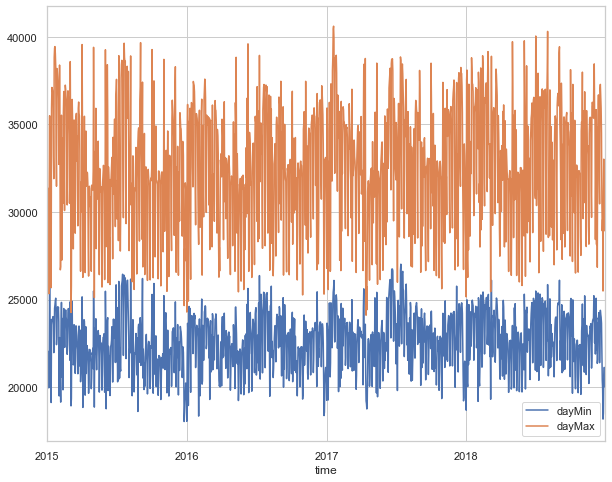

In [35]:
day_min_max = day_min.join(day_max)
day_min_max.plot()

_ = create_features(day_min_max)
day_min_max.loc['2018-12-31','weekofyear'] = 53
day_min_max.drop(columns='date',inplace=True)

day_min_max

<AxesSubplot:xlabel='time'>

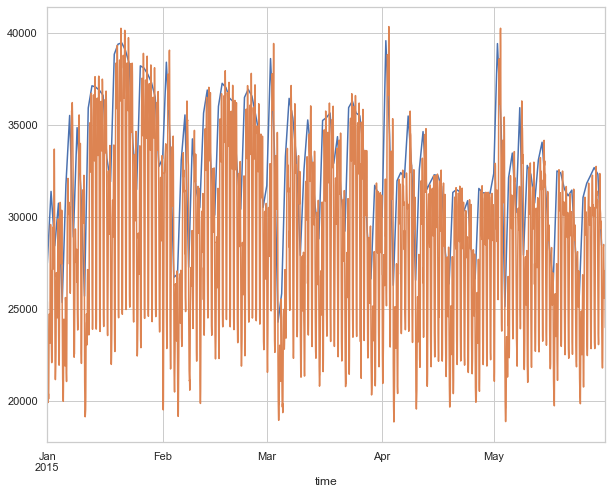

In [78]:
day_min_max['dayMax'].iloc[:150].plot()
df_EW_interp['total load actual'].iloc[:150*24].plot()

## EDA: Distributions of Feature Values

In [10]:
# energy_data.hist(figsize=(18, 10))
# plt.subplots_adjust(hspace=0.5);
# plt.show()

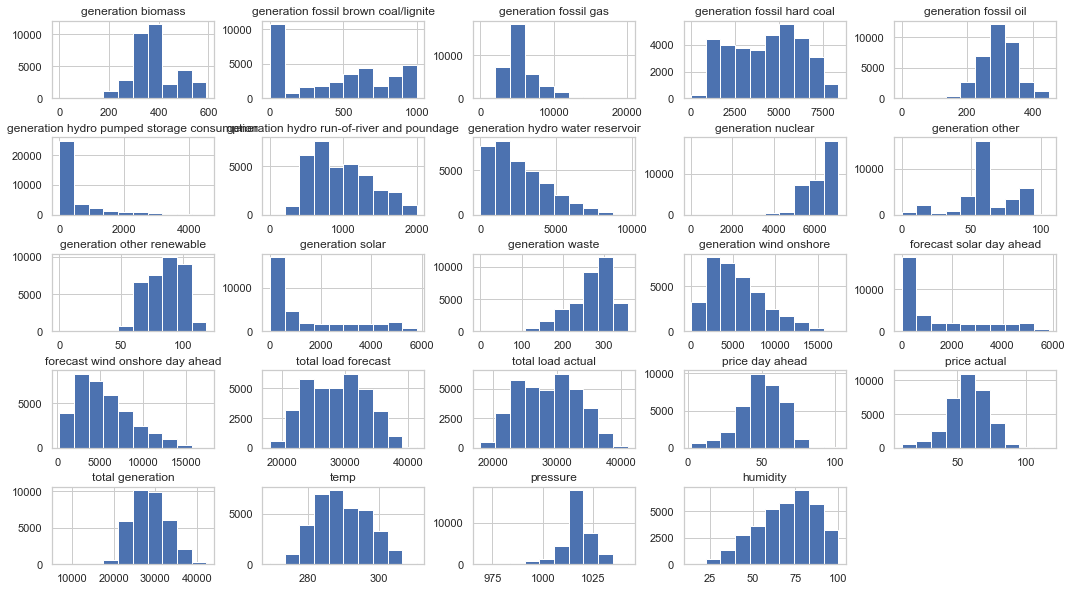

In [11]:
df_EW_interp.hist(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5);
plt.show()

## EDA: Feature Summary Statistics versus Time

In [12]:
# df['Month'] = df.index.to_period('M')
# monthly_avg = df.groupby('Month').mean().reset_index()
# monthly_median = df.groupby('Month').median().reset_index()
# monthly_std = df.groupby('Month').std().reset_index()

In [53]:
# Monthly avg. over time
#_ = monthly_avg.plot(x="Month", figsize=(8,15),subplots=True)
#_ = df[['price day ahead','price actual']].resample("1m").agg([np.mean, np.median]).plot(figsize=(15,4))

### Actual Load sampled by different time window

In [54]:
df[['total load actual']].head()

,total load actual
time,
2015-01-01 00:00:00+01:00,25385.0
2015-01-01 01:00:00+01:00,24382.0
2015-01-01 02:00:00+01:00,22734.0
2015-01-01 03:00:00+01:00,21286.0
2015-01-01 04:00:00+01:00,20264.0


* Total Actual Load Houly (2015-1-1 to 2015-3-1)

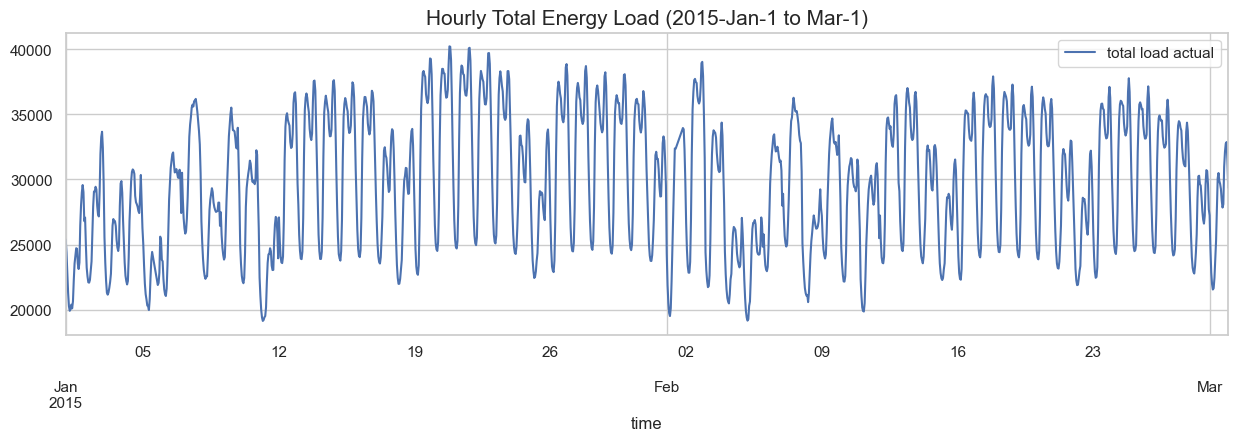

In [26]:
fig, ax = plt.subplots(1,1,dpi=100)
_ = df[['total load actual']].loc['2015-1-1':'2015-3-1'].plot(figsize=(15,4), ax=ax)
#ax.legend( title="", loc=3, fontsize=12, fancybox=True)
plt.title('Hourly Total Energy Load (2015-Jan-1 to Mar-1)', fontsize=15)
plt.show()

In [31]:
# Daily Max
day_max = (df.resample('1d')[['total load actual']].max()).resample('1d').mean().rename(columns={'total load actual':'dayMax'})

# Daily Min
day_min = df.resample('1d')[['total load actual']].min().rename(columns={'total load actual':'dayMin'})


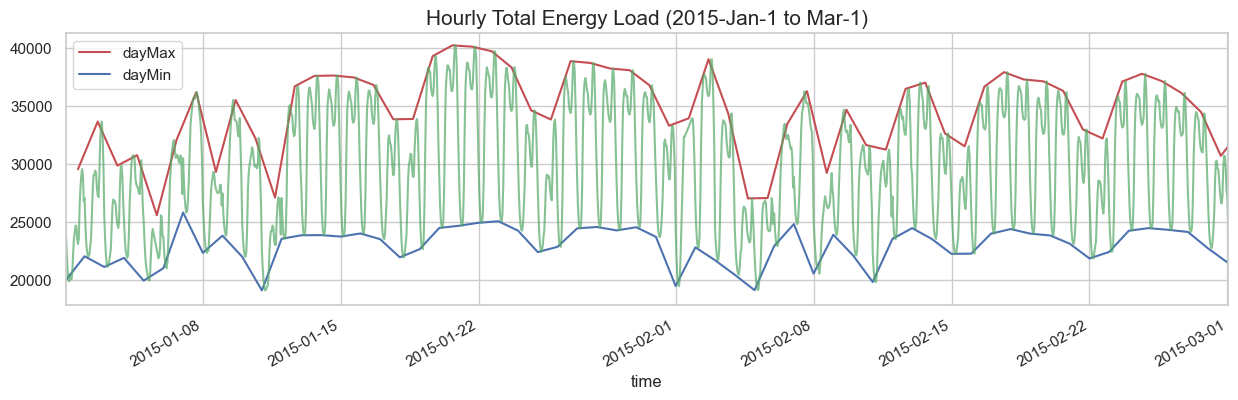

In [34]:
day_max_shift = day_max.copy()
day_max_shift.index = day_max_shift.index.shift(16, freq='h') #day_max.index+timedelta(hours=12)

fig, ax = plt.subplots(1,1,dpi=100, figsize=(15,4))

day_max_shift.iloc[:70].plot(ax=ax, color='r')
day_min.iloc[:70].plot(ax=ax, color='b')
df['total load actual'].iloc[:70*24].plot(ax=ax, color='g', alpha=0.7)
plt.xlim(['2015-1-1','2015-3-1'])
plt.title('Hourly Total Energy Load (2015-Jan-1 to Mar-1)', fontsize=15)
#plt.savefig('EDA_fig/hourly_load.pdf',dpi=100,pad_inches=0.1, bbox_inches='tight')
plt.show()

,dayMin,dayMax,dayofweek,quarter,month,weekofyear
time,,,,,,
2015-01-01 00:00:00+01:00,19905.0,29571.0,3,1,1,1
2015-01-02 00:00:00+01:00,22066.0,33668.0,4,1,1,1
2015-01-03 00:00:00+01:00,21145.0,29874.0,5,1,1,1
2015-01-04 00:00:00+01:00,21929.0,30772.0,6,1,1,1
2015-01-05 00:00:00+01:00,19964.0,25604.0,0,1,1,2


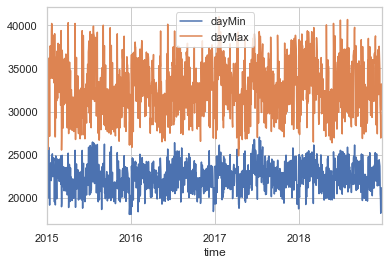

In [32]:
day_min_max = day_min.join(day_max)
day_min_max.plot()

_ = create_features(day_min_max)
day_min_max.loc['2018-12-31','weekofyear'] = 53
day_min_max.drop(columns='date',inplace=True)

day_min_max.head()

* Total Actual Load Avg. Daily (2015-1-1 to 2015-12-31)

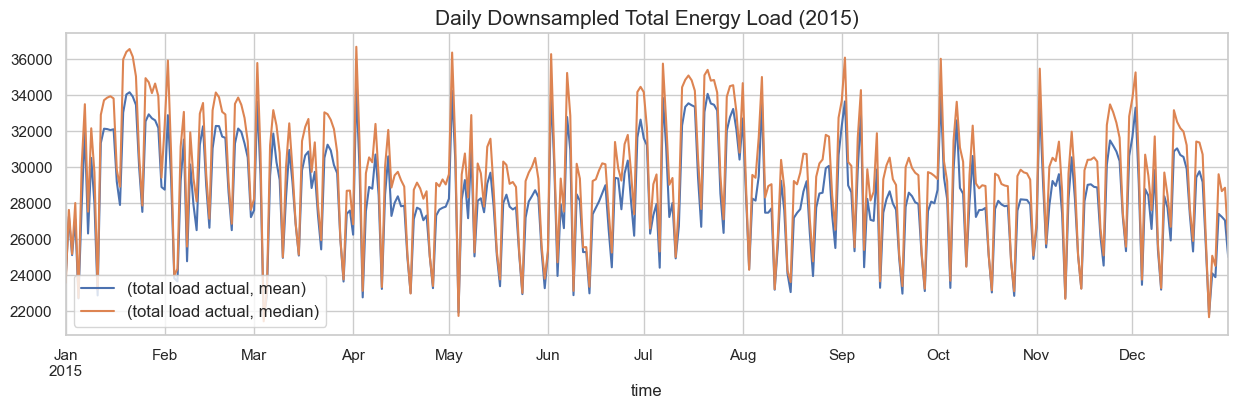

In [137]:
fig, ax = plt.subplots(1,1,dpi=100)
_ = df[['total load actual']].loc['2015-1-1':'2015-12-31'].resample("1d").agg([np.mean, np.median]).plot(figsize=(15,4), ax=ax)
ax.legend( title="", loc=3, fontsize=12, fancybox=True)
plt.title('Daily Downsampled Total Energy Load (2015)', fontsize=15)
#plt.savefig('EDA_fig/daily_load.pdf',dpi=100,pad_inches=0.1, bbox_inches='tight')
plt.show()

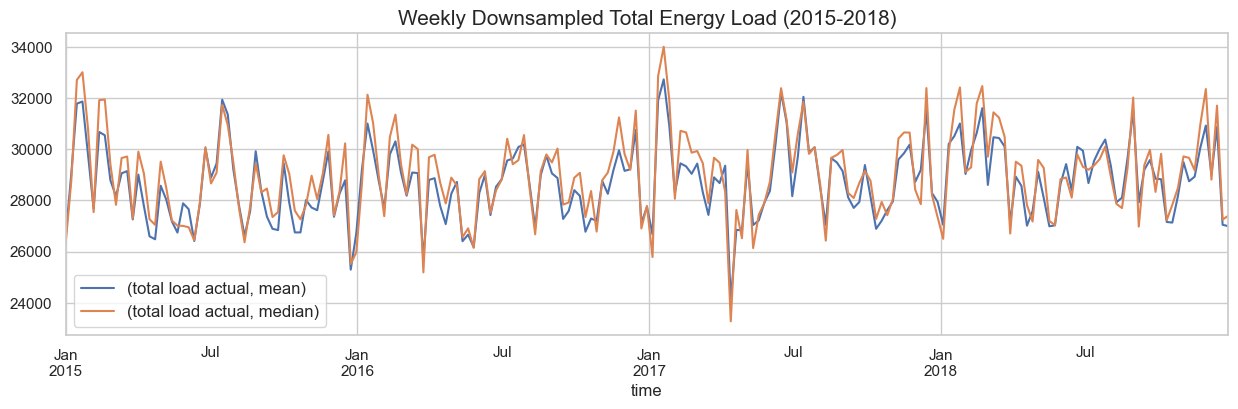

In [138]:
#_ = df[['total load forecast', 'total load actual']].resample("7d").agg([np.mean, np.median]).plot(figsize=(15,4))

fig, ax = plt.subplots(1,1,dpi=100)
_ = df[['total load actual']].resample("7d").agg([np.mean, np.median]).plot(figsize=(15,4), ax=ax)
ax.legend( title="", loc=3, fontsize=12, fancybox=True)
plt.title('Weekly Downsampled Total Energy Load (2015-2018)', fontsize=15)
#plt.savefig('EDA_fig/weekly_load.pdf',dpi=100,pad_inches=0.1, bbox_inches='tight')
plt.show()

In [52]:
#_ = df[['total load forecast', 'total load actual']].rolling("7d").agg([np.mean, np.median]).plot(figsize=(15,4))

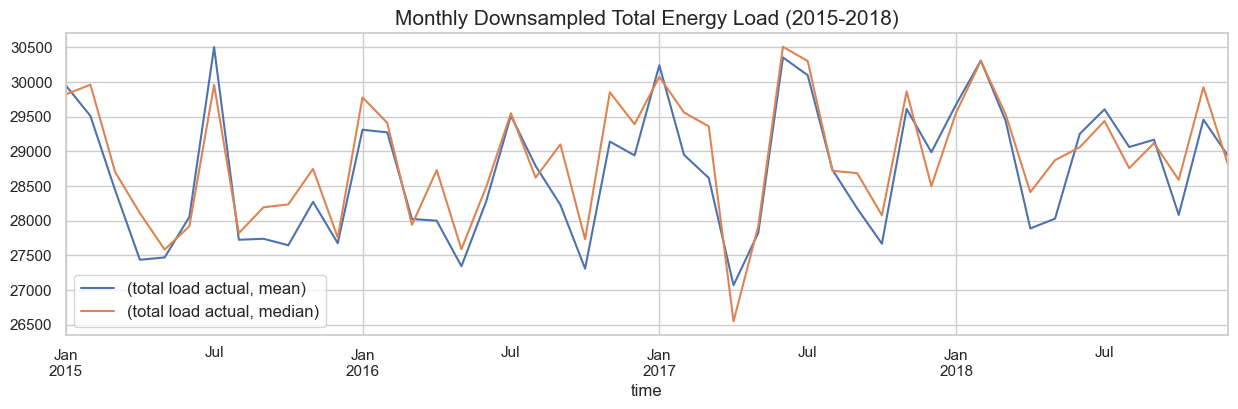

In [139]:
fig, ax = plt.subplots(1,1,dpi=100)
_ =  df[['total load actual']].resample("1m").agg([np.mean, np.median]).plot(figsize=(15,4), ax=ax)
ax.legend( title="", loc=3, fontsize=12, fancybox=True)
plt.title('Monthly Downsampled Total Energy Load (2015-2018)', fontsize=15)
#plt.savefig('EDA_fig/monthly_load.pdf',dpi=100,pad_inches=0.1, bbox_inches='tight')
plt.show()

### Energy Generation

In [56]:
import scipy.stats as stats

In [57]:
df_z_score = df.copy()
df_z_score.loc[:,:] = stats.zscore(df_z_score, axis=0, ddof=1)

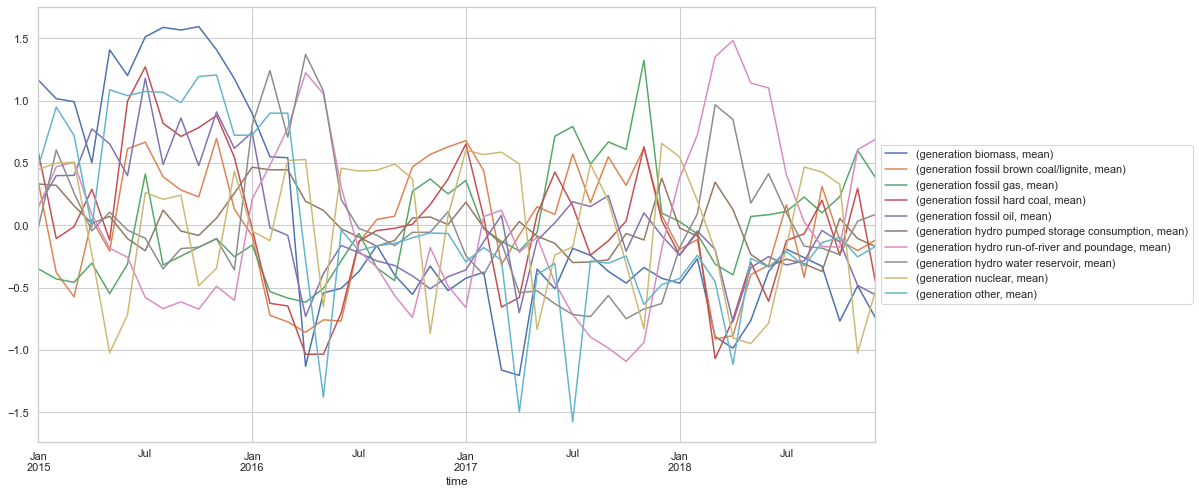

In [58]:
df_z_score.iloc[:,:10].resample("1m").agg([np.mean]).plot(figsize=(15, 8))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## EDA: Pearson correlation coefficients

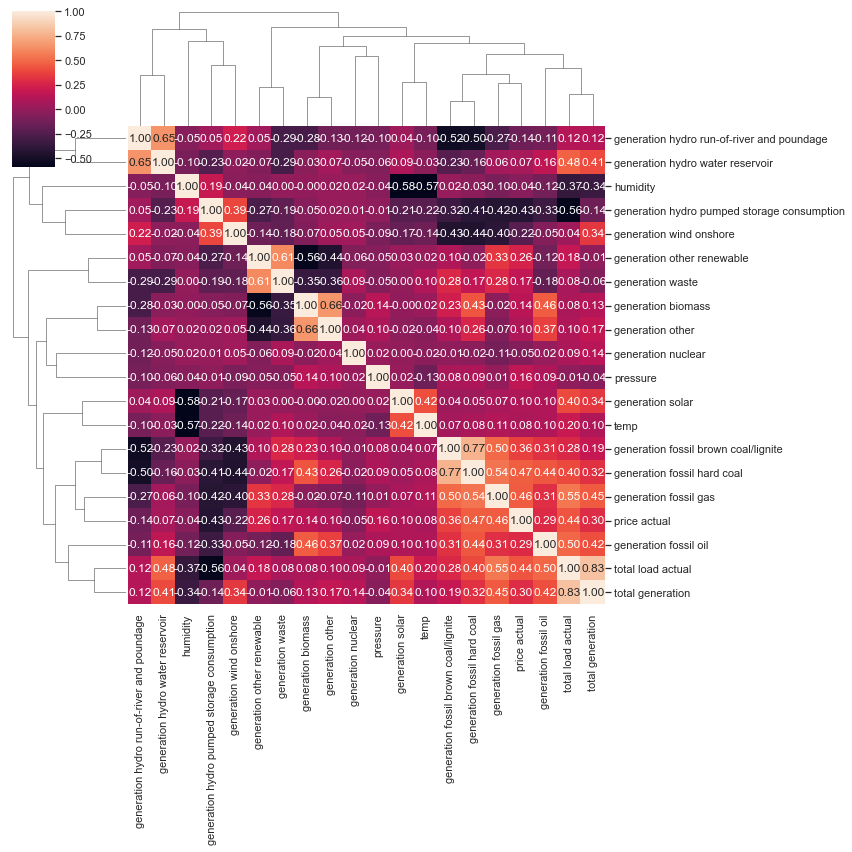

In [15]:
## Pearson correlation coefficients
sub_col = df_EW_interp.columns[~df_EW_interp.columns.str.contains(
    'total load forecast|price day ahead|forecast solar day ahead|forecast wind onshore day ahead')]

_ = sns.clustermap(df_EW_interp[sub_col].corr(), figsize=(12, 12), annot=True, fmt='.2f')

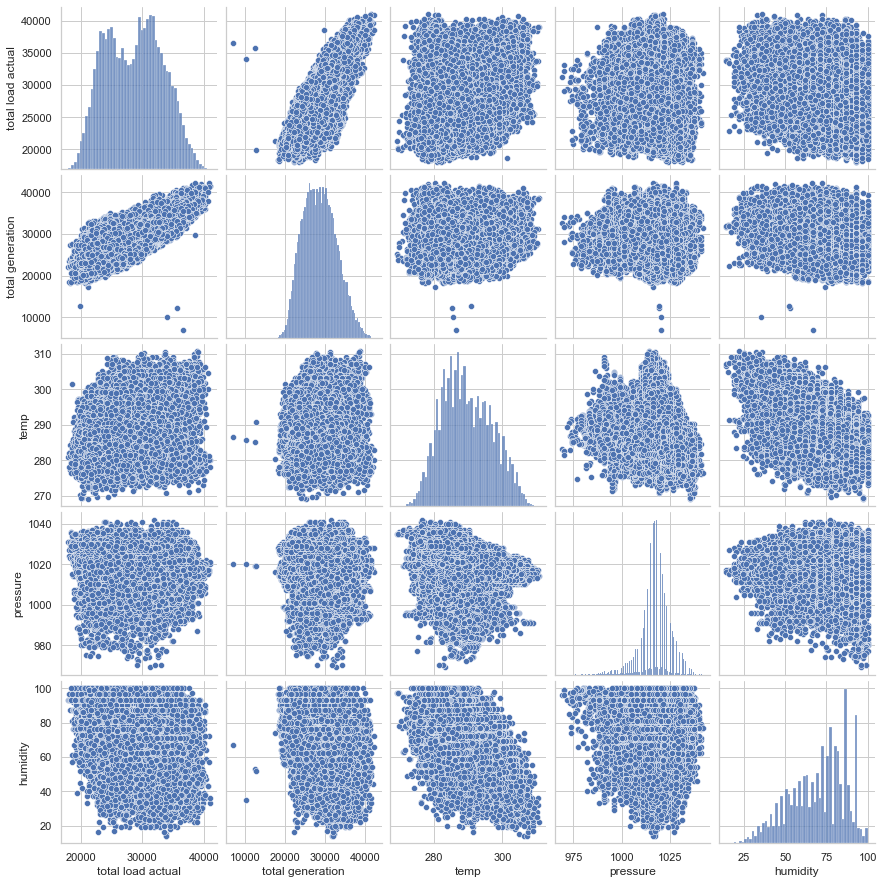

In [111]:
sns.pairplot(df_EW_interp[['total load actual','total generation', 'temp','pressure','humidity']])
plt.show()

In [12]:
# sub_col = ['generation biomass', 'generation fossil brown coal/lignite',
#        'generation fossil gas', 'generation fossil hard coal',
#        'generation fossil oil', 'generation hydro pumped storage consumption',
#        'generation hydro run-of-river and poundage',
#        'generation hydro water reservoir', 'generation nuclear',
#        'generation other', 'generation other renewable', 'generation solar',
#        'generation waste', 'generation wind onshore']

sns.jointplot(x='total generation',
              y='total load actual',
              data=df_EW_interp,
              kind="hex",
              color="#4CB391")
plt.show()

NameError: name 'df_EW_interp' is not defined

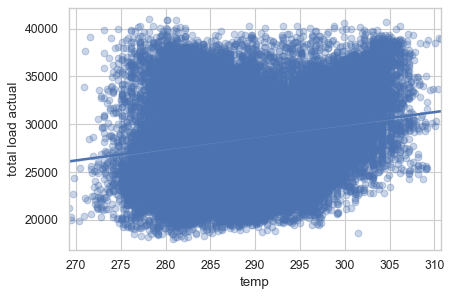

In [18]:
# Call the regplot method on your sns object, with parameters: x = 'total generation', y = 'total load actual'

fig, ax = plt.subplots(dpi=80)
sns.regplot(x='total generation',y='total load actual',data=df_EW_interp, scatter_kws={'alpha':0.3})
plt.show()

## EDA: Autocorrelation plot

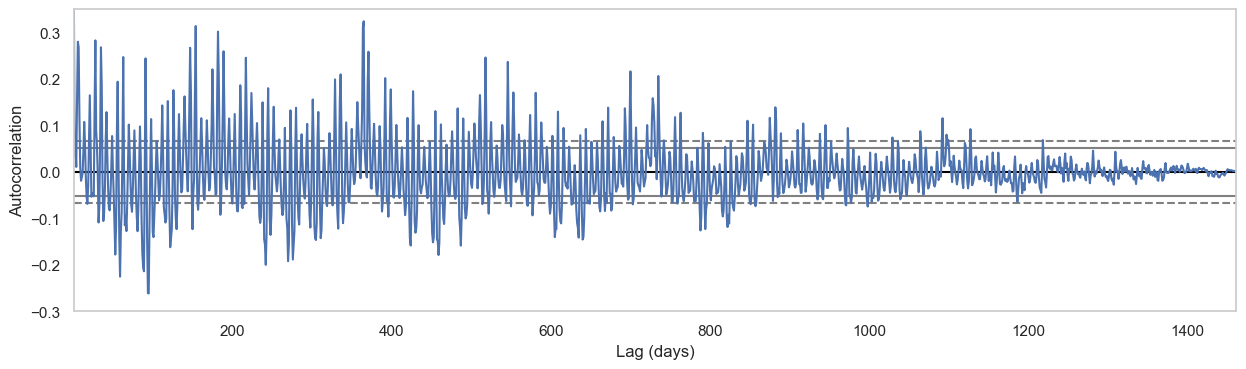

In [52]:
# Creating Autocorrelation plot
plt.figure(figsize=(15, 4), dpi=100)    
x = pd.plotting.autocorrelation_plot(df['total load actual'].resample("1d").agg([np.mean]))
 
# ploting the Curve
x.plot()
plt.ylim([-0.3, 0.35])
plt.xlabel('Lag (days)')

# Display
#plt.savefig('EDA_fig/daily_autocorr_load.pdf',dpi=100,pad_inches=0.1, bbox_inches='tight')
plt.show()

## EDA: Lag Features

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

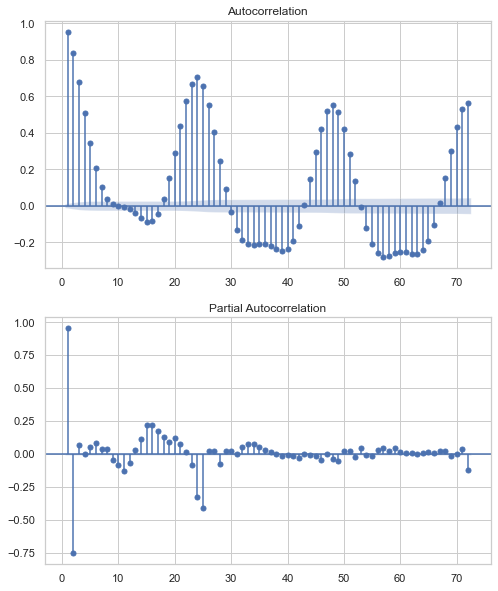

In [123]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
input_data = df['total load actual']#.diff().dropna()
plot_acf(input_data, lags=72, zero=False, ax=ax1)
plot_pacf(input_data, lags=72, zero=False, ax=ax2)
plt.show()

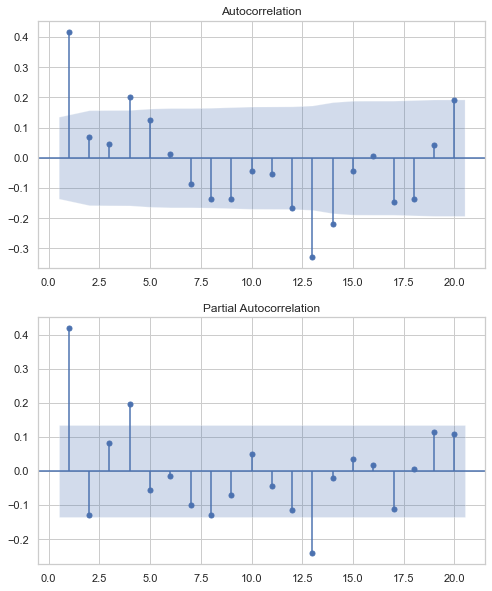

In [125]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
input_data = df['total load actual'].resample("7d").agg([np.mean])
plot_acf(input_data, lags=20, zero=False, ax=ax1)
plot_pacf(input_data, lags=20, zero=False, ax=ax2)
plt.show()

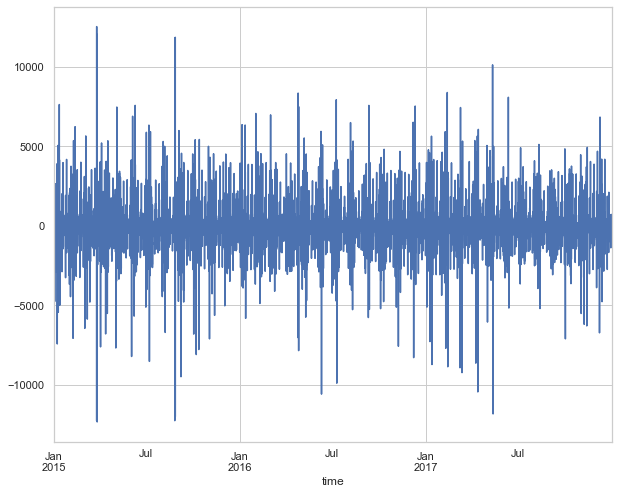

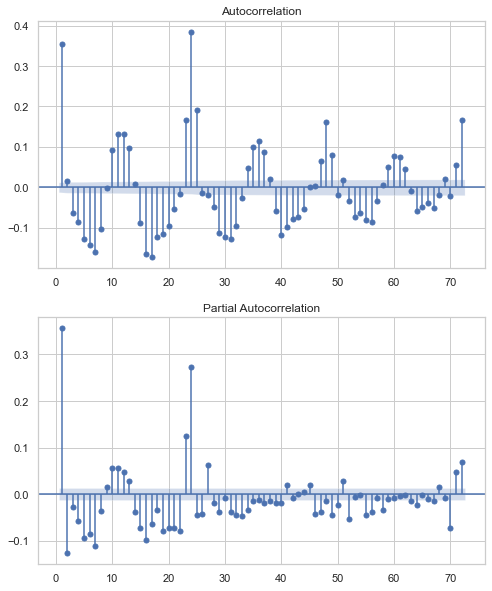

In [149]:
(decomposition.resid*decomposition.trend).diff(24).diff().plot()

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
input_data = (decomposition.resid*decomposition.trend).diff().dropna()

plot_acf(input_data, lags=72, zero=False, ax=ax1)
plot_pacf(input_data, lags=72, zero=False, ax=ax2)
plt.show()

In [ ]:
# # Loop over p values from 0-2
# for p in range(0, 3):
#     # Loop over q values from 0-2
#     for q in range(0, 3):

#         try:
#             # create and fit ARMA(p,q) model
#             model = SARIMAX(earthquake, order=(p, 0, q))
#             results = model.fit()

#             # Print order and results
#             print(p, q, results.aic, results.bic)

#         except:
#             print(p, q, None, None)

## EDA & Feature Engineer: Decomposition

### Total actual load (time step: hourly)

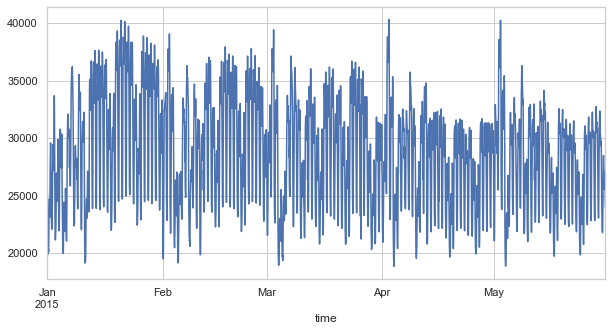

In [56]:
## df.sort_index(inplace=True)
temp = df_EW_interp['total load actual'].resample('1h').mean()

_ = temp.iloc[:24*150].plot(figsize=(10,5))

Check the seasonal decomposition wiith the period of 24 hours. Here, I use the first 3 years data. The last year (2018) is the holdout set and won't be used for training.

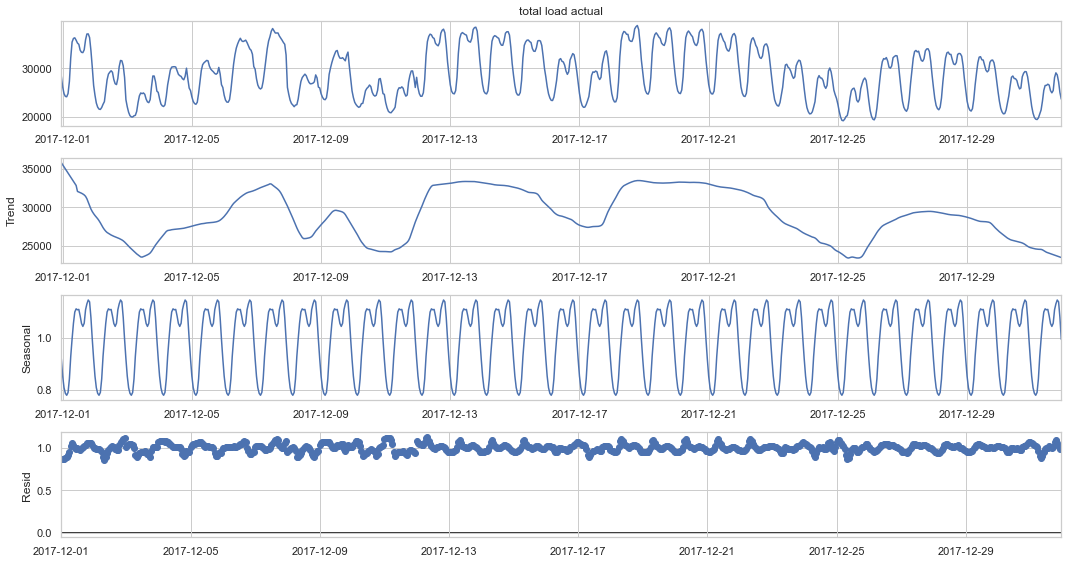

In [83]:
# Plot the original data, the trend, the seasonality, and the residuals 
decomposition = sm.tsa.seasonal_decompose(temp.loc['2017-12-1':'2017-12-31'], 
                                          model='multiplicative', #'additive', #'multiplicative',
                                          extrapolate_trend='freq', period=24)

plt.rcParams['figure.figsize'] = (15, 8)
ax = decomposition.plot()
plt.savefig('EDA_fig/seasonal_decompose_total_load.pdf',dpi=100, pad_inches=0.1, bbox_inches='tight')

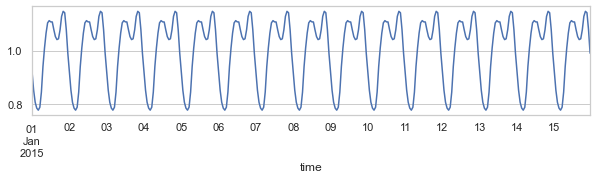

In [68]:
# Cheack the daily pattern (seasonal component)
_ = decomposition.seasonal.iloc[:360].plot(figsize=(10,2))

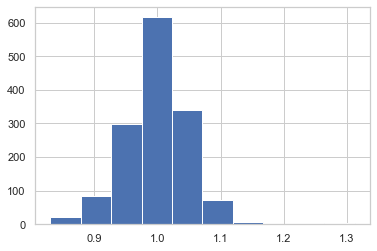

In [76]:
_ = decomposition.resid.hist(figsize=(6,4))

In [22]:
from scipy import stats

(428, 1)


trend
month weekofyear dayofweek          
1     1          0          0.663611
                 1         -0.664355
                 2         -0.809480
                 3         -2.031645
                 4          0.099221
                 5         -0.886716
                 6         -0.663836
      2          0         -2.010968
                 1         -0.505461
                 2          1.169413

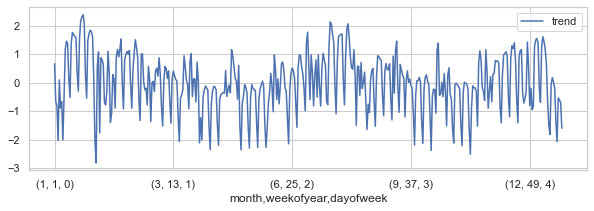

In [107]:
trend = decomposition.trend.to_frame()
trend[['dayofweek','month', 'weekofyear']] = df_EW_interp[['dayofweek','month', 'weekofyear']].copy()

## The trend of "energy load" groupby ['month', 'weekofyear', 'dayofweek']
month_day_med = trend.groupby(['month','weekofyear','dayofweek']).median().copy()
month_day_med['trend'] = stats.zscore(month_day_med['trend'])

_ = month_day_med.plot(style='-', figsize=(10,3))

print(month_day_med.shape)

display(month_day_med.head(10))


In [108]:
df_new = df_EW_interp.reset_index().merge(
    month_day_med, on=['month', 'weekofyear',
                       'dayofweek'], how='left').set_index('time')

df_new.drop(columns='date', inplace=True)

display(df_new.head())

## Save the engineered data
#df_new.to_csv('data/energy_feat.csv')

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,price actual,total generation,temp,pressure,humidity,dayofweek,quarter,month,weekofyear,trend
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,65.41,28251.0,270.475000,1035.0,77.0,3,1,1,1,-2.031645
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,64.92,27818.0,269.763500,1035.0,97.0,3,1,1,1,-2.031645
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,64.48,26796.0,269.686000,1036.0,78.0,3,1,1,1,-2.031645
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,59.32,25223.0,269.203344,1035.0,97.0,3,1,1,1,-2.031645
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,56.04,24620.0,269.485500,1035.0,97.0,3,1,1,1,-2.031645


### Daily minimum and maximun load (time step: daily)

In [110]:
## Daily minimum and maximun load (peak and valley of each day)
day_min_max.head(10)


,dayMin,dayMax,dayofweek,quarter,month,weekofyear
time,,,,,,
2015-01-01 00:00:00+01:00,19905.0,27478.0,3,1,1,1
2015-01-02 00:00:00+01:00,22066.0,31370.0,4,1,1,1
2015-01-03 00:00:00+01:00,21145.0,28416.5,5,1,1,1
2015-01-04 00:00:00+01:00,21929.0,30728.5,6,1,1,1
2015-01-05 00:00:00+01:00,19964.0,25336.5,0,1,1,2
2015-01-06 00:00:00+01:00,21042.0,31743.5,1,1,1,2
2015-01-07 00:00:00+01:00,25838.0,35495.5,2,1,1,2
2015-01-08 00:00:00+01:00,22361.0,28888.5,3,1,1,2
2015-01-09 00:00:00+01:00,23840.0,34834.0,4,1,1,2


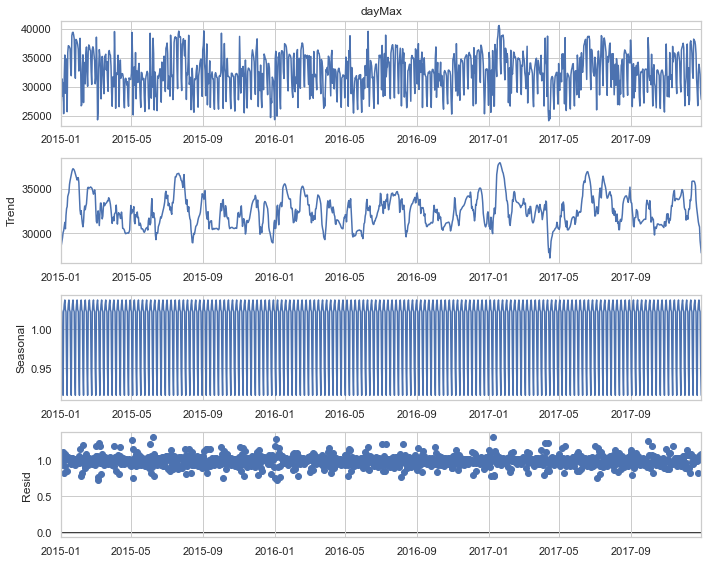

In [126]:
# Plot the Daily-Max data, the trend, the seasonality, and the residuals 
decomposition_dayMax = sm.tsa.seasonal_decompose(day_min_max.dayMax.loc[:'2017'], 
                                          model='multiplicative',
                                          extrapolate_trend='freq', period=7)

plt.rcParams['figure.figsize'] = (10, 8)
ax = decomposition_dayMax.plot()

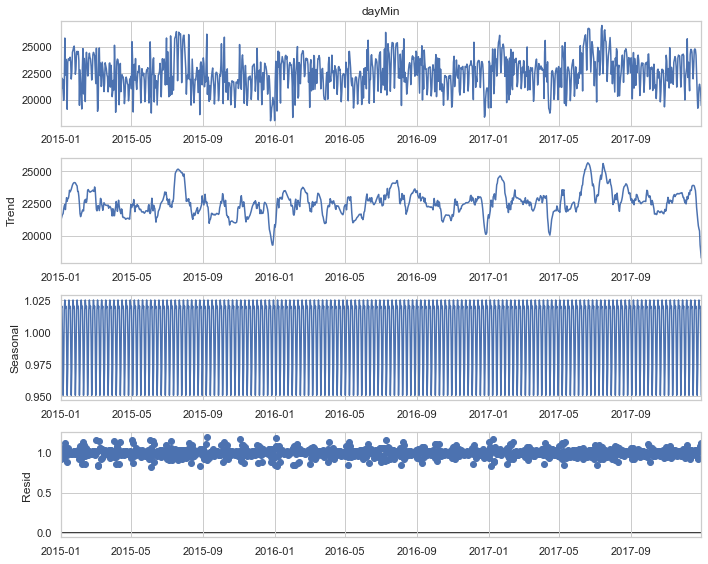

In [146]:
# Plot the Daily-Min data, the trend, the seasonality, and the residuals 
decomposition_dayMin = sm.tsa.seasonal_decompose(day_min_max.dayMin.loc[:'2017'], 
                                          model='multiplicative',
                                          extrapolate_trend='freq', period=7)

plt.rcParams['figure.figsize'] = (10, 8)
ax = decomposition_dayMin.plot()

In [147]:
trend_daily = day_min_max[['dayofweek','month', 'weekofyear']].copy()

trend_daily['trend_dayMax'] = decomposition_dayMax.trend.to_frame()['trend']
trend_daily['trend_dayMin'] = decomposition_dayMin.trend.to_frame()['trend']
trend_daily.dropna(inplace=True)

trend_daily

,dayofweek,month,weekofyear,trend_dayMax,trend_dayMin
time,,,,,
2015-01-01 00:00:00+01:00,3,1,1,28677.326531,21329.122449
2015-01-02 00:00:00+01:00,4,1,1,29080.224490,21488.520408
2015-01-03 00:00:00+01:00,5,1,1,29483.122449,21647.918367
2015-01-04 00:00:00+01:00,6,1,1,30081.214286,21698.428571
2015-01-05 00:00:00+01:00,0,1,2,30282.714286,22049.285714
...,...,...,...,...,...
2017-12-27 00:00:00+01:00,2,12,52,30929.357143,20540.857143
2017-12-28 00:00:00+01:00,3,12,52,30712.428571,20372.857143
2017-12-29 00:00:00+01:00,4,12,52,29167.096939,19291.719388


,trend_dayMax,trend_dayMin
weekofyear,,
1,31049.807256,22160.205782
2,32981.642857,22904.088435
3,35999.044218,23668.625850
4,35698.632653,23587.163265
5,33674.278912,22682.639456


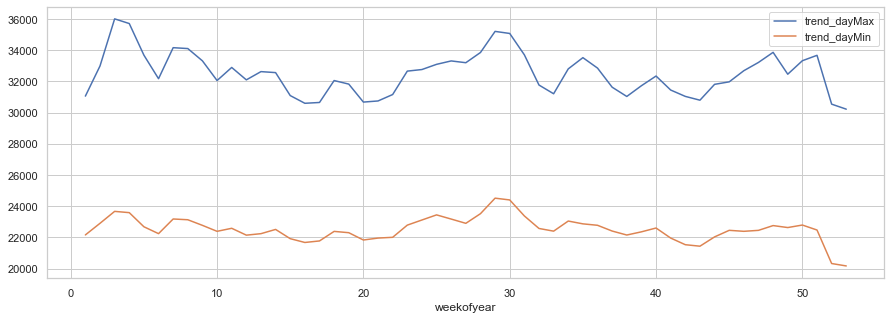

In [148]:
dayMax_by_weekofyear = trend_daily.groupby(['weekofyear']).mean()[['trend_dayMax', 'trend_dayMin']].copy()
#dayMax_by_weekofyear[['trend_dayMax', 'trend_dayMin']] = stats.zscore(dayMax_by_weekofyear)

_ = dayMax_by_weekofyear.plot(style='-', figsize=(15,5))

dayMax_by_weekofyear.head()

## EDA: Stationarity

In [23]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    '''
    Null Hypothesis: The series has a unit root (non-stationary).
    Alternate Hypothesis: The series has no unit root.
    '''
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    '''
    Null Hypothesis: The process is trend stationary.
    Alternate Hypothesis: The series has a unit root (series is not stationary).
    
    Code adopt from
    https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
    '''
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

* Case 1: Both tests conclude that the series is not stationary - The series is not stationary
* Case 2: Both tests conclude that the series is stationary - The series is stationary
* Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
* Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

In [39]:
#kpss_test(temp)
kpss_test(decomposition.trend.dropna())

Results of KPSS Test:
Test Statistic             0.796638
p-value                    0.010000
Lags Used                110.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [26]:
#adf_test(temp)

adf_test(decomposition.trend)

Results of Dickey-Fuller Test:
Test Statistic                -7.654644e+00
p-value                        1.752119e-11
#Lags Used                     5.100000e+01
Number of Observations Used    3.501200e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64
